# Lesson 4.04 - Classification Metrics II

## Import Libraries
#### "Explicit is better than implicit"
By being specific in your import statements, you are making your code:
* More readable
* Easier to maintain
* Easier for IDEs to "lint" i.e. debug and recommended optimisations

Read more in the <b>COMMENTS SECTION</b> of this [link](https://towardsdatascience.com/import-all-python-libraries-in-one-line-of-code-86e54f6f0108) on why you should not import all Python libraries in one line of code

In [1]:
import matplotlib.pyplot as plt

import numpy as np
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Import metrics.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, RocCurveDisplay, roc_auc_score, recall_score, precision_score, f1_score

## Load the Dataset
 The code below loads a modified version of the iris dataset which has two classes (categories). 
* A `1` is a virginica flower
* A `0` is versicolor flower

In [2]:
df = pd.read_csv('data/modifiedIris2Classes.csv')

In [3]:
df.shape

(100, 5)

## Splitting Data into Training and Test Sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(df[['petal length (cm)']], df['target'], random_state=0)

## Standardize the Data
Logistic Regression is impacted by scale so you need to scale the features in the data before using Logistic Regresison.  

Scikit-Learn's `StandardScaler` helps standardize the dataset’s features for better performance by changing the values so that the distribution standard deviation from the mean equals one. More info can be found [here](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02).

In [5]:
scaler = StandardScaler()

# Fit on training set only.
scaler.fit(X_train)

# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Logistic Regression

<b>Step 1:</b> Import the model you want to use

In [6]:
# This was already imported earlier in the notebook so commenting out
#from sklearn.linear_model import LogisticRegression

<b>Step 2:</b> Make an instance of the Model

In [7]:
lr = LogisticRegression()

<b>Step 3:</b> Training the model on the data, storing the information learned from the data

Model is learning the relationship between x (features sepal width, sepal height etc) and y (labels-which species of iris)

In [8]:
lr.fit(X_train, y_train)

LogisticRegression()

<b>Step 4:</b> Predict the labels of new data (new flowers)

#### Logistic regression shows the predictions as well as prediction probabilities.
This is unlike other classification models like KNN and decision trees which only give you a prediction and we will discuss further in the coming weeks.

In [9]:
# One observation's petal length after standardization
# X_test[0].reshape(1, -1) reshapes the first sample in the X_test dataset into a 2-dimensional array with 1 row and an inferred number of columns. This reshaping is typically done to match the expected input shape of the model.
X_test[0].reshape(1,-1)

array([[-0.12093628]])

In [10]:
print('Prediction: ', lr.predict(X_test[0].reshape(1,-1))[0])
print('Probability: ', lr.predict_proba(X_test[0].reshape(1,-1)))

Prediction:  0
Probability:  [[0.52720087 0.47279913]]


#### Based on the model and results above:
* The probability of a 0 is approx 0.53
* The probability of a 1 is approx 0.47
* Since the probability of a 0 is greater than 0.5, the model predicts a 0

#### If this is unclear, let's visualize how logistic regression makes predictions by looking at our test data as seen below

In [11]:
# Load X values after standardization into petal length column
example_df = pd.DataFrame()
example_df.loc[:, 'petal length (cm)'] = X_test.reshape(-1)
example_df.loc[:, 'target'] = y_test.values

# Retrieving the predicted probability for the class=1 for each X_test value
example_df['logistic_preds'] = pd.DataFrame(lr.predict_proba(X_test))[1]

In [12]:
# Compare actual target with the predicted probability for class=1

# For example for Row Index=1, the actual class (target col) is 1 while  
# pred prob of class 1 is 95% which assigns the predicted class 

example_df.head()

,petal length (cm),target,logistic_preds
0,-0.120936,0,0.472799
1,0.846554,1,0.950658
2,0.000000,0,0.568197
3,2.055917,1,0.998879
4,1.330299,1,0.988926


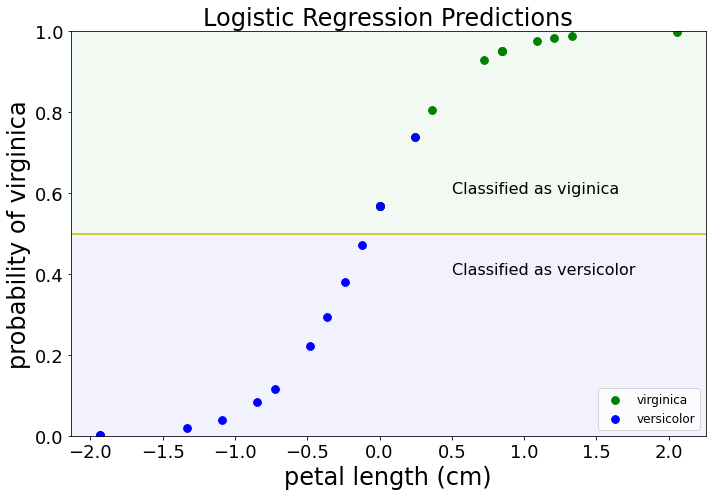

In [13]:
# Plot the probability of getting a virginica flower i.e. prob >= 0.5
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));


virginicaFilter = example_df['target'] == 1
versicolorFilter = example_df['target'] == 0

ax.scatter(example_df.loc[virginicaFilter, 'petal length (cm)'].values,
            example_df.loc[virginicaFilter, 'logistic_preds'].values,
           color = 'g',
           s = 60,
           label = 'virginica')


ax.scatter(example_df.loc[versicolorFilter, 'petal length (cm)'].values,
            example_df.loc[versicolorFilter, 'logistic_preds'].values,
           color = 'b',
           s = 60,
           label = 'versicolor')

ax.axhline(y = .5, c = 'y')

ax.axhspan(.5, 1, alpha=0.05, color='green')
ax.axhspan(0, .4999, alpha=0.05, color='blue')
ax.text(0.5, .6, 'Classified as viginica', fontsize = 16)
ax.text(0.5, .4, 'Classified as versicolor', fontsize = 16)

ax.set_ylim(0,1)
ax.legend(loc = 'lower right', markerscale = 1.0, fontsize = 12)
ax.tick_params(labelsize = 18)
ax.set_xlabel('petal length (cm)', fontsize = 24)
ax.set_ylabel('probability of virginica', fontsize = 24)
ax.set_title('Logistic Regression Predictions', fontsize = 24)
fig.tight_layout()


## Measuring Model Performance

While there are other ways of measuring model performance (precision, recall, F1 Score, ROC Curve, etc), let's keep this simple and use accuracy as our metric. 
To do this are going to see how the model performs on new data (test set)

#### Accuracy is defined as: (fraction of correct predictions): correct predictions / total number of data points

In [14]:
score = lr.score(X_test, y_test)
print(score)

0.88


Accuracy is one metric, but it doesn't say give much insight into what was wrong. Let's look at the confusion matrix

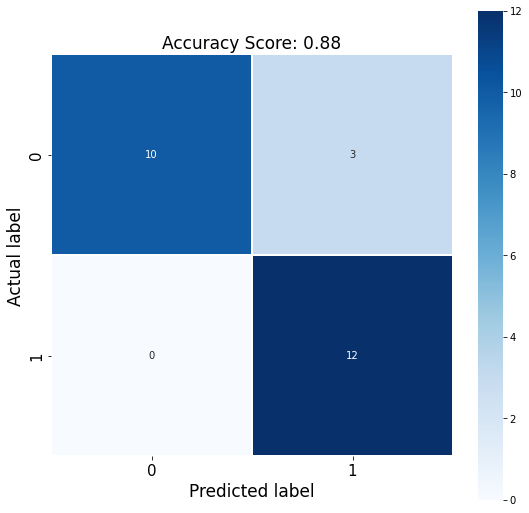

In [15]:
# Generate predictions.
preds = lr.predict(X_test)

# Generate confusion matrix.
# Documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
cm = confusion_matrix(y_test, preds)

# plot it!
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True,
            fmt=".0f",
            linewidths=.5,
            square = True,
            cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

It may be challenging to interpret the table above. Let's attempt to visualise the data in a clearer way. 

In [16]:
# Create modified labels for Confusion Matrix
modified_cm = []
for index,value in enumerate(cm):
    if index == 0:
        modified_cm.append(['TN = ' + str(value[0]), 'FP = ' + str(value[1])])
    if index == 1:
        modified_cm.append(['FN = ' + str(value[0]), 'TP = ' + str(value[1])])   
        

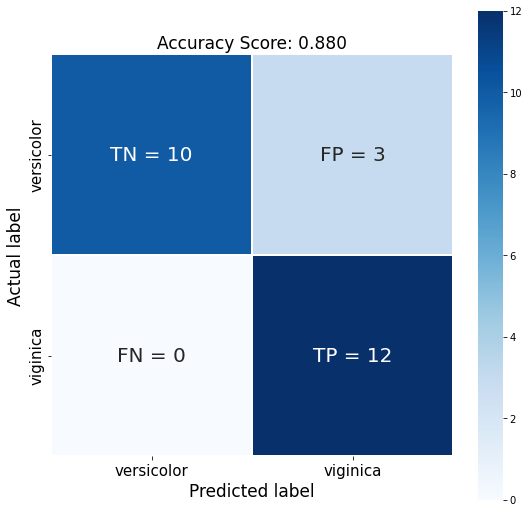

In [17]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=np.array(modified_cm),
            fmt="",
            annot_kws={"size": 20},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['versicolor', 'viginica'],
            yticklabels = ['versicolor', 'viginica'],
            );

plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy Score: {:.3f}'.format(score), size = 17);
plt.tick_params(labelsize= 15)

### Beyond Accuracy 
<b>Recap:</b> Accuracy is the share of all total predictions that were correct <br/>
Scikit Learn Metrics offer other ways to evaluate your model as seen below.

#### Sensitivity a.k.a Recall (True Positive Rate)

In [18]:
# Save TN/FP/FN/TP values.
tn, fp, fn, tp = cm.ravel()

# Note that .ravel() will arrange items in a one-dimensional array.
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html

# you could calculte manually
sens = tp / (tp + fn)
sens

1.0

In [19]:
# or you could use the sklearn recall method
recall = recall_score(y_test, preds)
recall

1.0

#### Specificity (True Negative Rate)

In [20]:
spec = tn / (tn + fp)
spec

0.7692307692307693

#### Precision (Ratio of True Positives vs All Positives)

In [21]:
# By hand
prec = tp / (tp + fp)
prec

0.8

In [22]:
# from sklearn
precision = precision_score(y_test, preds)
precision

0.8

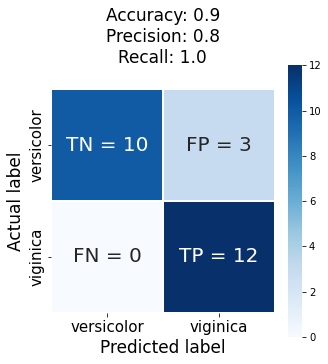

In [23]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=np.array(modified_cm),
            fmt="",
            annot_kws={"size": 20},
            linewidths=.5,
            square = True,
            cmap = 'Blues',
            xticklabels = ['versicolor', 'viginica'],
            yticklabels = ['versicolor', 'viginica'],
            );

plt.ylabel('Actual label', fontsize = 17);
plt.xlabel('Predicted label', fontsize = 17);
plt.title('Accuracy: {:.1f}'.format(score)+'\n'
          +'Precision: {:.1f}'.format(prec)+'\n'
          +'Recall: {:.1f}'.format(recall)+'\n', size = 17);
plt.tick_params(labelsize= 15)

## Receiver Operating Characteristic (ROC) Curve

Plot the True Positive Rate vs. False Positive Rate for the range of possible decision thresholds and you get the ROC curve!

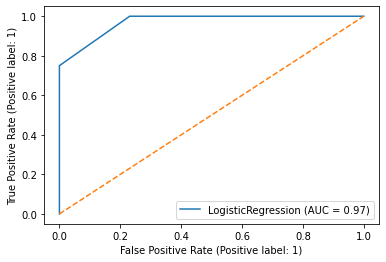

In [24]:
roc_display = RocCurveDisplay.from_estimator(lr, X_test, y_test)
plt.plot([0, 1], [0, 1], label='baseline', linestyle='--')

In [25]:
roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])

0.9711538461538463

### Let's check out [this visualization](http://www.navan.name/roc/)

### Interpreting ROC AUC
- If you have an ROC AUC of 0.5, your positive and negative populations perfectly overlap and your model is as bad as it can get.
- If you have an ROC AUC of 1, your positive and negative populations are perfectly separated and your model is as good as it can get.
- The closer your ROC AUC is to 1, the better. (1 is the maximum score.)
- If you have an ROC AUC of below 0.5, your positive and negative distributions have flipped sides. By flipping your predicted values (i.e. flipping predicted 1s and 0s), your ROC AUC will now be above 0.5.
    - Example: You have an ROC AUC of 0.2. If you change your predicted 1s to 0s and your predicted 0s to 1s, your ROC AUC will now be 0.8!

We generate one ROC curve per model. The ROC curve is generated by varying our threshold from 0 to 1. This doesn't actually change the threshold or our original predictions, but it helps us to visualize our tradeoff between _sensitivity_ and _specificity_ and understand how well-separated our populations are.

### Let's check out [this visualization](http://www.navan.name/roc/)

### Changing your prediction threshold

If you want, you could change your prediction threshold to a custom value.

In [26]:
# Create a function to compare the prediction probabilities against the user-defined threshold
# If predicted probability is lesser than user-defined threshold, then assign 0
# If predicted probability is greater than user-defined threshold, then assign 1
def get_predictions(probabilities, threshold):
    return [0 if prob < threshold else 1 for prob in probabilities]

In [27]:
# Display predicted class for first 10 rows of X_Test based on custom threshold value of 0.3
print(get_predictions(lr.predict_proba(X_test)[:,1], 0.3)[:10])

[1, 1, 1, 1, 1, 1, 0, 1, 1, 1]


In [28]:
# Generate and compare model accuracy for various threshold values
# Conclusion: Changing  default threshold value of 0.5 to other values does not improve accuracy
threshold_list = [0.25, 0.4, 0.5, 0.6, 0.75]

for threshold in threshold_list:
    preds = get_predictions(lr.predict_proba(X_test)[:,1], threshold)
    acc = accuracy_score(y_test, preds)
    print(f'Threshold: {threshold}, Accuracy: {acc}')

Threshold: 0.25, Accuracy: 0.76
Threshold: 0.4, Accuracy: 0.84
Threshold: 0.5, Accuracy: 0.88
Threshold: 0.6, Accuracy: 0.88
Threshold: 0.75, Accuracy: 0.88


## Interview Questions

**1. What is the ROC curve?**
    
- The ROC curve is a plot of the True Positive Rate (sensitivity) vs. the False Positive Rate (1 - specificity) for all possible decision thresholds.

**2. Let's say you were building a search engine and wanted to build a classification model that would recommend articles based on the search input. What metric would you want to optimize for and why?**
    
- You could make a case for wanting to minimize false positives (stories that weren't relevant), in which case you'd want to optimize for precision.
- You could make a case for wanting to minimize false negatives (not passing along possibly useful content), in which case you'd want to optimize for recall. 
- Alumni Comment: "The interviewer seemed more interested in seeing if I knew what the metrics were and explaining what priorities would lead me to optimize for one over the other."

More interview practice questions on these topics [here](https://kiwidamien.github.io/interview-practice-with-precision-and-recall.html)!